In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

# Personal imports
from classes.ou_network import OU_Network

%matplotlib inline

# Visualise participants' data through each of their trials

/!\ Need to run compile_database.py first /!\\

Caution, the total size of the outputs from this will be 259 MB.

### Load database

In [2]:
with open('./data/database.obj', 'rb') as inFile:
    exp = pickle.load(inFile)

crime_order = ['Police action', 'Population happiness', 'Crime rate']
housing_order = ['House Prices', 'Desirability', 'Population Density']
virus_order = ['Virus Cases', 'Stock Prices', 'Lockdown Measures']


### Plot participants

Participants can be plotted either via their unique ID or as an index in the full database across experiments
- 0-59: Experiment 1
- 60-179: Experiment 2
- 180-299: Experiment 3
- 300-419: Experiment 4

In [3]:
idx = 44
#pid = '5fb91837b8c8756d924f7351'

Participant:  44 PID: 5ecd84fc5216e60fe17dd26a
Condition:  ccause_2
True model:  [1 1 0 0 0 0]
Posterior mode:  [-0.5 -0.5  0.   0.   0.   0. ]
Accuracy:  0.64 

Condition:  collider_2
True model:  [ 0 -1  0 -1  0  0]
Posterior mode:  [ 0.  -0.5  0.  -0.5  0.   0. ]
Accuracy:  0.88 

Condition:  crime_2
True model:  [-1.  -0.5  1.  -0.5  0.   0. ]
Posterior mode:  [-1.  -0.5  1.  -0.5  0.   0. ]
Accuracy:  1.00 

Condition:  pos_chain_3
True model:  [1 0 0 1 0 0]
Posterior mode:  [1.  0.5 0.  1.  0.  0. ]
Accuracy:  0.91 



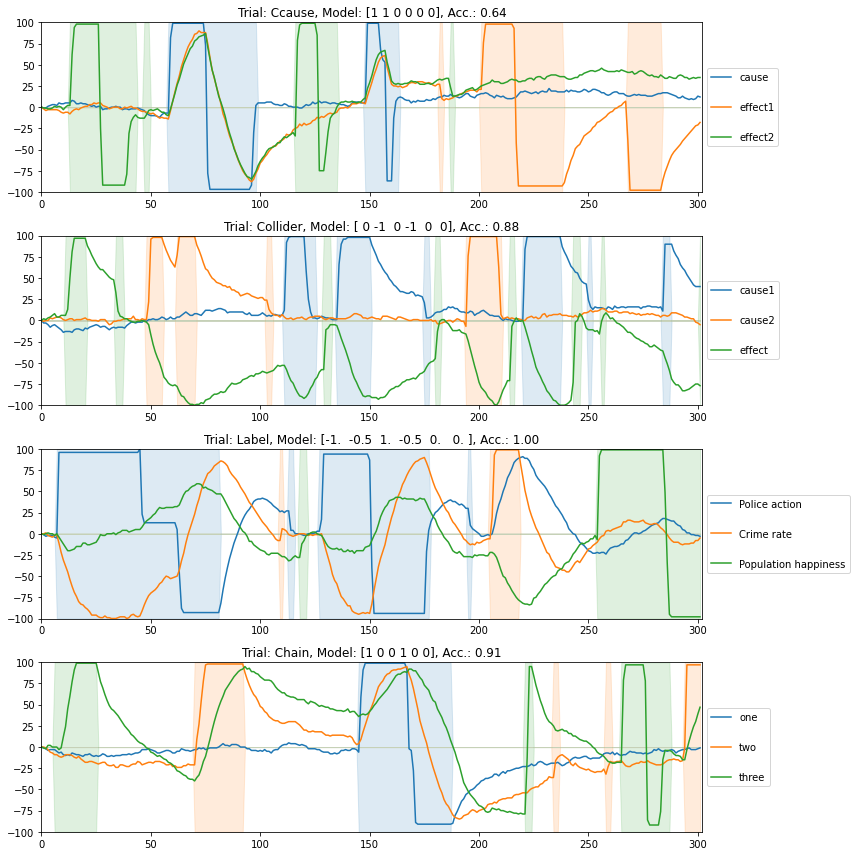

In [4]:
# Compile participant's data as a numpy array in proper order
exp.plot_participant_data(idx=idx, summary=True)
#exp.plot_participant_data(pid=pid, summary=False)
#idx += 1



### Prettier plots for the article

In [5]:
def plot_data(ax, data, inters, labels, title, legend_labels=None):
    K = data.shape[1]
    palette = sns.color_palette() # Set palette
    sns.set_palette(palette)


    for k in range(K):
        if legend_labels:
            label = legend_labels[k]
        else:
            label = labels[k].capitalize()
        # PLot data 
        sns.lineplot(data=data[:,k], lw=1.5, label=label, ax=ax) # Plot da
        # Plot interventions where relevant
        ax.set_title(title, fontsize=15)
        ints = inters == k
        if np.sum(ints) == 0:
            continue
        
        x = np.arange(len(ints))
        y1 = -100 * ints
        y2 = 100 * ints
        ax.fill_between(x, y1, y2, color=palette[k], alpha=0.15)

        ax.set_ylim(-100, 100)
        ax.set_xlim(0, len(ints))
        ax.legend(labelspacing=2, loc=6, bbox_to_anchor=(1, 0.5), fontsize=15)
  

In [6]:
idx = 44

data, inters, labels, trial_name = exp.recover_participant_trial_data(idx=idx, trial_idx=0)

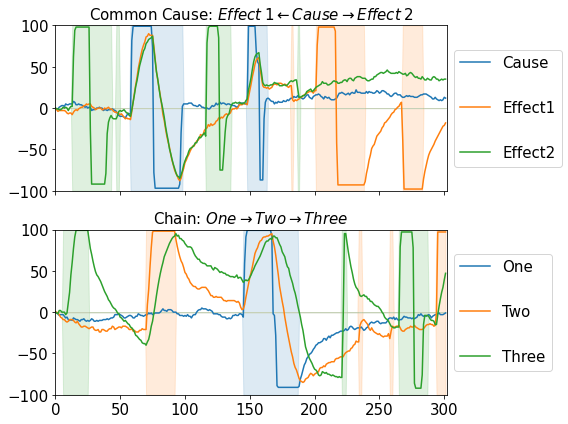

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

titles = [
    r'Common Cause: $Effect \: 1 \leftarrow Cause \rightarrow Effect \: 2$',
    r'Chain: $One \rightarrow Two \rightarrow Three$',   
]

idx = 44

data, inters, labels, trial_name = exp.recover_participant_trial_data(idx=idx, trial_idx=0)

plot_data(axs[0], data, inters, labels, titles[0])

axs[0].set_yticks([-100, -50, 0, 50, 100])
plt.setp(axs[0].get_yticklabels(), fontsize=15)

idx = 44
trial_idx = 3

data, inters, labels, trial_name = exp.recover_participant_trial_data(idx=idx, trial_idx=trial_idx)

plot_data(axs[1], data, inters, labels, titles[1])

axs[1].set_yticks([-100, -50, 0, 50, 100])
plt.setp(axs[1].get_yticklabels(), fontsize=15)
plt.setp(axs[1].get_xticklabels(), fontsize=15)

plt.tight_layout()
plt.savefig('.\\plots\\sampled_paths.pdf')

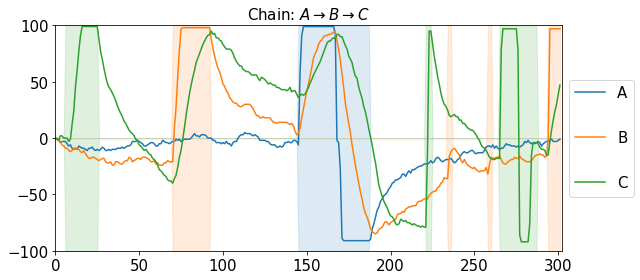

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4), sharex=True)

titles = [
    r'Common Cause: $Effect \: 1 \leftarrow Cause \rightarrow Effect \: 2$',
    r'Chain: $A \rightarrow B \rightarrow C$',   
]
idx = 44
trial_idx = 3

data, inters, labels, trial_name = exp.recover_participant_trial_data(idx=idx, trial_idx=trial_idx)

plot_data(ax, data, inters, labels, titles[1], legend_labels=['A', 'B', 'C'])

ax.set_yticks([-100, -50, 0, 50, 100])
plt.setp(ax.get_yticklabels(), fontsize=15)
plt.setp(ax.get_xticklabels(), fontsize=15)

plt.tight_layout()
plt.savefig('.\\plots\\sampled_paths_ccn.pdf')